Question 3

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Load the Wine Quality Dataset
wine_data = pd.read_csv(r'C:\Users\prato\OneDrive\Desktop\EECE 5644 - Intro to ML\Assignment 1\winequality-red.csv', delimiter=';')

# Print first few rows to confirm
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [7]:
print(wine_data['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [8]:
# Separate features and labels
X = wine_data.iloc[:, :-1].values  # All columns except the last
y = wine_data.iloc[:, -1].values   # Last column is the label

In [45]:
classes = np.unique(y)

In [35]:
class_priors = {}
unique_labels = np.unique(y)  # Get the unique class labels

for label in unique_labels:
    # Calculate the prior as the fraction of samples belonging to the class
    prior = np.mean(y == label)
    class_priors[label] = prior  # Store the prior in the dictionary with the label as the key


Class Priors: {np.int64(3): np.float64(0.006253908692933083), np.int64(4): np.float64(0.03314571607254534), np.int64(5): np.float64(0.425891181988743), np.int64(6): np.float64(0.3989993746091307), np.int64(7): np.float64(0.12445278298936835), np.int64(8): np.float64(0.01125703564727955)}


In [36]:
means = {}

for label in unique_labels:
    # Select all samples that belong to the current class
    class_samples = X[y == label]
    # Calculate the mean vector for the current class
    mean_vector = class_samples.mean(axis=0)
    means[label] = mean_vector  # Store the mean vector in the dictionary with the label as the key

print("Mean Vectors:", means)



Mean Vectors: {np.int64(3): array([ 8.36    ,  0.8845  ,  0.171   ,  2.635   ,  0.1225  , 11.      ,
       24.9     ,  0.997464,  3.398   ,  0.57    ,  9.955   ]), np.int64(4): array([ 7.77924528,  0.69396226,  0.17415094,  2.69433962,  0.09067925,
       12.26415094, 36.24528302,  0.99654245,  3.38150943,  0.59641509,
       10.26509434]), np.int64(5): array([ 8.16725404,  0.57704112,  0.24368576,  2.52885463,  0.09273568,
       16.98384728, 56.51395007,  0.99710363,  3.3049486 ,  0.62096916,
        9.89970631]), np.int64(6): array([ 8.34717868,  0.49748433,  0.27382445,  2.47719436,  0.08495611,
       15.71159875, 40.86990596,  0.99661506,  3.3180721 ,  0.67532915,
       10.62951933]), np.int64(7): array([ 8.87236181,  0.4039196 ,  0.37517588,  2.72060302,  0.07658794,
       14.04522613, 35.0201005 ,  0.99610427,  3.29075377,  0.74125628,
       11.4659129 ]), np.int64(8): array([ 8.56666667,  0.42333333,  0.39111111,  2.57777778,  0.06844444,
       13.27777778, 33.44444444,  

In [38]:
covariances = {}
lambda_reg = 0.01  # Regularization parameter

for label in unique_labels:
    # Select all samples that belong to the current class
    class_samples = X[y == label]
    # Calculate the covariance matrix for the current class
    covariance_matrix = np.cov(class_samples, rowvar=False)
    # Regularize the covariance matrix
    covariance_matrix_regularized = covariance_matrix + lambda_reg * np.eye(covariance_matrix.shape[0])
    covariances[label] = covariance_matrix_regularized  # Store the regularized covariance matrix in the dictionary


In [39]:
# Apply Minimum-P(error) Classification Rule
errors = []
y_pred = []
for sample in X:
    posteriors = []
    for label in np.unique(y):
        likelihood = multivariate_normal.pdf(sample, mean=means[label], cov=covariances[label])
        posterior = likelihood * class_priors[label]
        posteriors.append(posterior)
    y_pred.append(np.unique(y)[np.argmax(posteriors)])
errors = np.mean(y_pred != y)

In [42]:
# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)


In [44]:
error_count = np.sum(conf_matrix) - np.trace(conf_matrix)  # Total errors
total_samples = np.sum(conf_matrix)  # Total samples
prob_error = error_count / total_samples  # Probability of error
print(prob_error)

0.3983739837398374


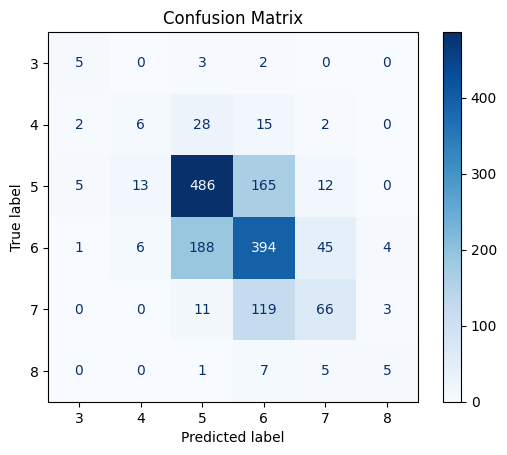

In [43]:
# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))

# Plot the confusion matrix
disp.plot(cmap='Blues')  # You can choose other colormaps if you like
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Assuming X_wine and y_wine contain the features and labels for the Wine Quality dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

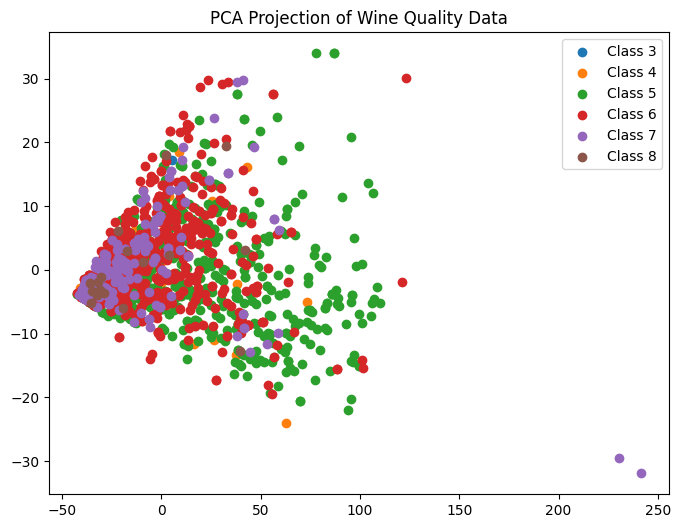

In [46]:
plt.figure(figsize=(8, 6))
for cls in classes:
    plt.scatter(X_pca[y == cls, 0], X_pca[y == cls, 1], label=f"Class {cls}")
plt.title("PCA Projection of Wine Quality Data")
plt.legend()
plt.show()

In [33]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

C:\Users\prato\AppData\Local\Temp\ipykernel_9688\1737546362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


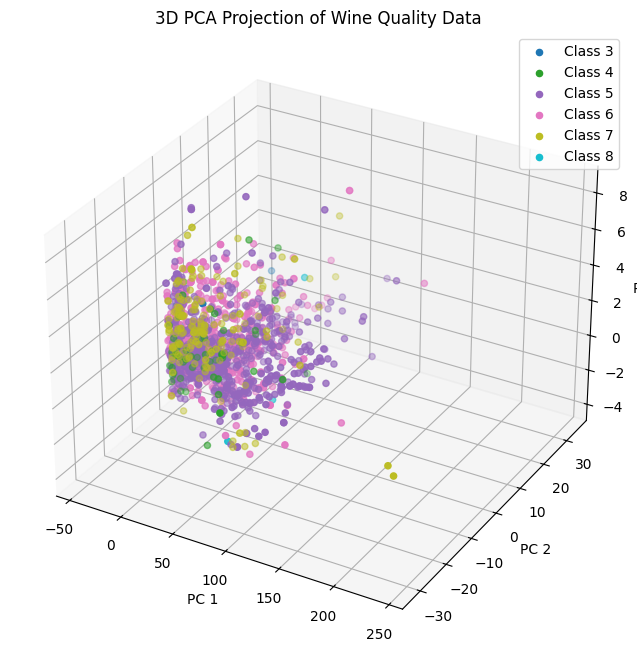

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign different colors to each class for visualization
classes = np.unique(y)
colors = plt.cm.get_cmap('tab10', len(classes))

for i, cls in enumerate(classes):
    ax.scatter(X_pca3[y == cls, 0], X_pca3[y == cls, 1], X_pca3[y == cls, 2], 
               label=f'Class {cls}', color=colors(i), s=20)

ax.set_title('3D PCA Projection of Wine Quality Data')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend()
plt.show()